In [5]:
--1.feladat
SELECT 
case GROUPING(sz.SZOBA_ID)
when 0 then cast(sz.SZOBA_ID as nvarchar(10))
when 1 then 'Összesen'
end as 'Szoba id',
case grouping_id(sz.SZOBA_ID, year(f.METTOL))
when 0 then cast(year(f.mettol) as nvarchar(4))
when 1 then 'Évek'
when 3 then 'Összesen'
end as 'Évek',count(*) as 'foglalaások száma'
FROM szoba sz join Foglalas f on sz.SZOBA_ID=f.SZOBA_FK
group by rollup(sz.SZOBA_ID, year(f.METTOL))

: Msg 4145, Level 15, State 1, Line 14
An expression of non-boolean type specified in a context where a condition is expected, near ')'.

Total execution time: 00:00:00.002

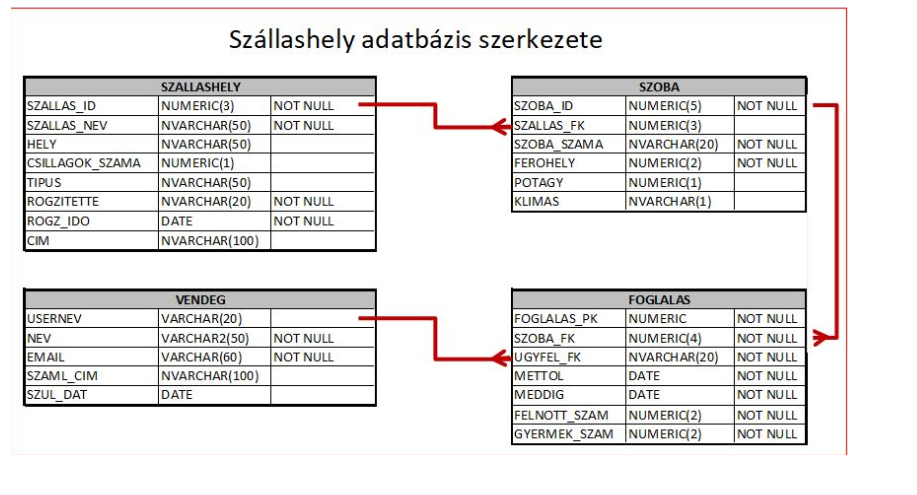

In [21]:
SELECT sza.SZALLAS_NEV, count(f.FOGLALAS_PK)
FROM Foglalas f join szoba sz on f.SZOBA_FK=sz.SZOBA_ID
join szallashely sza on sz.SZALLAS_FK=sza.SZALLAS_ID
group by sza.SZALLAS_NEV
having count(f.FOGLALAS_PK)>(SELECT count(f1.FOGLALAS_PK)
FROM Foglalas f1 join szoba sz1 on f.SZOBA_FK=sz.SZOBA_ID
join szallashely sza1 on sz1.SZALLAS_FK=sza1.SZALLAS_ID 
where sza1.SZALLAS_NEV='Fortuna panzió'
group by sza1.SZALLAS_NEV)

: Msg 8121, Level 16, State 1, Line 6
Column 'Foglalas.SZOBA_FK' is invalid in the HAVING clause because it is not contained in either an aggregate function or the GROUP BY clause.

: Msg 8121, Level 16, State 1, Line 6
Column 'szoba.SZOBA_ID' is invalid in the HAVING clause because it is not contained in either an aggregate function or the GROUP BY clause.

Total execution time: 00:00:00.003